# CascadeBandit-UCB

In [729]:
import sys
import os 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from random import random, randrange, betavariate
from numpy.random import uniform, choice
import math 

from utils import *
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [809]:
list_L =[16,16,16,8]
list_K =[2,4,4,2]
list_delta = [0.15,0.15,0.075,0.075]
n_runs = 5
p=0.2
number_of_rounds =  int(1e5)

In [810]:
## Experiment with multiple runs

In [811]:
n_regret = np.zeros((len(list_L),n_runs))

for i, (L, K , delta)  in enumerate(zip(list_L,list_K,list_delta) ):
    for run in range(n_runs) : 
        weights = [p for i in range(K)] + [np.abs(p-delta) for i in range(L-K)]
        cascade_model = CascadeUCB(number_of_rounds,L,K)
        dataset = generate_data(number_of_rounds, weights)
        cascade_model.initialize(dataset,weights)
        for t in range(1,number_of_rounds) :
            cascade_model.one_round(t,dataset)
        n_regret[i,run]=cascade_model.regrets[-1]

In [812]:
res = pd.DataFrame({'L': list_L ,
              'K':list_K, 
              'delta': list_delta,
              'mean' :n_regret.mean(axis=-1),
              'std': n_regret.std(axis=-1)})
#res.to_csv('res.csv')
res

,L,K,delta,mean,std
0,16,2,0.150,1450.317585,93.478219
1,16,4,0.150,1126.881310,87.185288
2,16,4,0.075,1676.822317,74.855028
3,8,2,0.075,981.877786,31.372638


In [730]:
number_of_rounds =  int(1e5)
p = 0.2
delta  = 0.15
L = 8
K = 2
weights = [p for i in range(K)] + [np.abs(p-delta) for i in range(L-K)]

cascade_model = CascadeUCB(number_of_rounds,L,K)
dataset = generate_data(number_of_rounds, weights)

# initializing
cascade_model.initialize(dataset,weights)

# training
for t in range(1,number_of_rounds) :
    cascade_model.one_round(t,dataset)


# Analysis

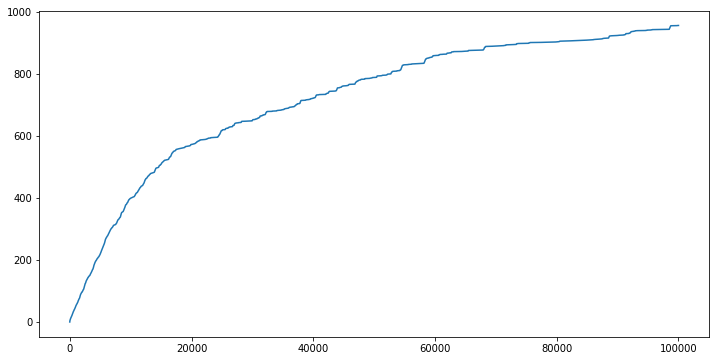

In [820]:
regrets = pd.Series(regrets)
plt.figure(figsize=(12, 6))
plt.plot(cascade_model.regrets)

## Cumulative item selections

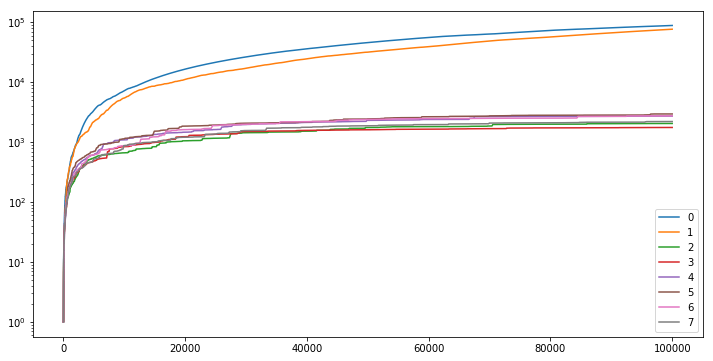

In [808]:
cascade_model.T = pd.DataFrame(cascade_model.T)
fig, ax = plt.subplots(figsize=(12,6))
plt.yscale('log')
ax.plot(cascade_model.T)
ax.legend(cascade_model.T)